***

# The numpy.random package

***
https://numpy.org/doc/stable/docs/index.html

### What is Numpy?

NumPy, which is short for Numerical Python,  is an open source project created in 2005 by Travis Oliphant. In Python, Numpy is the fundamental library in scientific computing [1]. It forms the foundations that some of the most important data analytics (pandas) and machine learning (scikit-learn) deploy.
At the core of Numpy are multidimensional array object (ndarry). It also provides various derived objects (e.g. masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic) statistical operations, random simulation and much more [2].

###### Arrays

- An array class is called as ndarray
- The data in an ndarray must be homogeneous, i.e. all elemets contained in it must be the same type.
- They have a dtype attribute which is an object that describes the data type of the array.
- Size = the total number of elements an array contains. 
- A tuple of integers giving the size of the array along each dimension is known as shape of the array.
- Elements in Numpy arrays are accessed by using square brackets and can be initialized by using nested Python Lists
- Arrays have a ndim attribute for the number of axes or dimensions of the array [4].


##### Why Use NumPy?


NumPy arrays are stored in one continuous place in memory unlike Python lists, this makes accessing and manipulate much more efficent. This is incredibly important when working with large amounts of data. Array's also provide many more methods and functions which make working with them "easier".

The advantages of using Numpy:
- Speed: NumPy uses algorithms written in C that complete in nanoseconds rather than seconds.
- Fewer loops: NumPy helps you to reduce loops and keep from getting tangled up in iteration indices.
- Clearer code: Without loops, your code will look more like the equations you’re trying to calculate.
- Better quality: There are thousands of contributors working to keep NumPy fast, friendly, and bug free. [3]

In [1]:
### Importing the libary
import numpy as np

# Plotting
import matplotlib.pyplot as plt



### What is numpy.random?
https://numpy.org/doc/stable/reference/random/index.html#:~:text=Random%20sampling%20(%20numpy.-,random%20),Objects%20that%20generate%20random%20numbers.


Randomness has many uses in science, art, statistics, cryptography, gaming, gambling, and other fields. For example, random assignment in randomized controlled trials helps scientists to test hypotheses, and random numbers or pseudorandom numbers help video games such as video poker. Many elements of statistical practice depend on randomness via random numbers. Where those random numbers fail to be actually random, any subsequent statistical analysis may suffer from systematic bias. Elements of statistical practice that depend on randomness include: choosing a representative sample of the population being examined,[7]

Random number does NOT mean a different number every time. Random means something that can not be predicted logically. numpy.random is a module in the numpy library used for arrays. [5 ]
Numpy.random is used to create arrays of random numbers . The reason we use this “fake data'' is that it enables people to test before working with real data. It can efficiently generate arrays of sample values from many kinds of probability distributions [6.]

Python has a random module, which allows for the generation of single random numbers with a few basic distributions. numpy.random has much more functionability; allowing the genration of whole arrays of random numbers, ways to work with these arrays and allows for a wider selection of probability distributions.

numpy.random can be broken into:
- Simple random data
- Permutations
- Distribution
<br></br>https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator

 ***
 ### Simple Random Data
 ***


#### random.randint
 An array of specified shape filled with random integers from low (inclusive) to high (exclusive).

In [82]:
# A Random intergr between 0 and 4
np.random.randint(100) 

46

In [36]:
# A random intergr between low 0 and 10 (exculsive).
np.random.randint(0,10)

0

In [253]:
# A random intergr between low -10 and 10 (exculsive)
np.random.randint(-10, 10)

-3

In [34]:
# An array of 5 random intergrs between 0 (low) and 10 (exculsive).
np.random.randint(0, 10, 5)

array([5, 9, 2, 1, 0])

The above is a 1D array. numpy.random also allows us to make more dimensional arrays. See examples below

In [48]:
# 2D array of random intergers 
np.random.randint(low=2, size=(2,2))

array([[1, 0],
       [1, 1]])

In [61]:
# 3D array of random numbers
np.random.randint(0, 5, (2, 2, 2))

array([[[4, 2],
        [4, 1]],

       [[0, 2],
        [3, 4]]])

#### random.rand
An array of a given shape of random (float) values between 0 and 1, including 0 and not 1 from a uniform distribution. The first value passed is the number of "rows" inthe array. The second is the amount of values each row containsAny, other arguments passed indicate the number of ndarrays. Deminsions should be posistive

In [90]:
# If no argument is given a single random Python float is returned.
np.random.rand()

0.04656154926806033

In [91]:
# Generating 4 random values. 1D array
np.random.rand(4)

array([0.74358368, 0.25946667, 0.09023278, 0.27195276])

In [113]:
# A 2D array containing 4 vaules each
x = np.random.rand(2, 4)
x

array([[0.70289351, 0.70835447, 0.87147144, 0.39662842],
       [0.79760623, 0.76419001, 0.01796012, 0.2682593 ]])

In [115]:
# We can manipulte the arrays. 
y = x * 10 # Multiplying each element in the array by 10.
y

array([[7.02893511, 7.08354467, 8.71471441, 3.9662842 ],
       [7.97606228, 7.64190009, 0.17960119, 2.682593  ]])

In [89]:
# A 3D array 
np.random.rand(2, 2, 3)

array([[[0.74339936, 0.48834103, 0.78301526],
        [0.96558453, 0.00665951, 0.00803413]],

       [[0.39624854, 0.33167741, 0.10517407],
        [0.02853499, 0.28590282, 0.08061109]]])

(array([10000., 10103.,  9777., 10255.,  9932.,  9793., 10085.,  9984.,
        10055., 10016.]),
 array([9.55592831e-06, 1.00008555e-01, 2.00007555e-01, 3.00006554e-01,
        4.00005554e-01, 5.00004553e-01, 6.00003553e-01, 7.00002552e-01,
        8.00001552e-01, 9.00000551e-01, 9.99999551e-01]),
 <BarContainer object of 10 artists>)

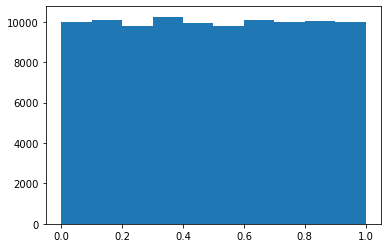

In [99]:
# Plotting a histogram to show the uniform distribution
hist_plot = np.random.rand(100000)
plt.hist(hist_plot)

The histogram shows a uniform (rectangule) distribution. There spread of elements in each bin are similar in number.  If a smaller number was chosen the uniform shape would be less evident. See the histogram below

(array([17., 12., 11.,  9.,  6.,  7.,  7., 12.,  9., 10.]),
 array([0.01592493, 0.11197711, 0.20802929, 0.30408147, 0.40013365,
        0.49618583, 0.59223801, 0.68829019, 0.78434238, 0.88039456,
        0.97644674]),
 <BarContainer object of 10 artists>)

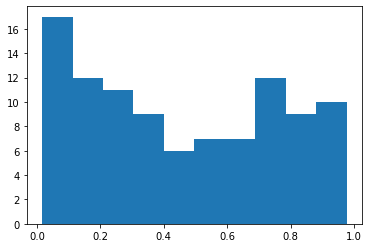

In [96]:
h = np.random.rand(100)
plt.hist(h)

#### random.randn
While random.rand is for the uniform distribution  (in the half-open interval [0.0, 1.0))., random.randn is for standard normal (aka. Gaussian) distribution (mean 0 and variance 1). It generates a n-dimensional array of numbers from the standard normal distribution. 

https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

In [107]:
# If no argument is given a single random Python float is returned.
np.random.randn()

-1.1812318322877395

In [106]:
# 1D array of 4 values
np.random.randn(4)

array([-0.54036841,  1.11120074, -1.05022092,  0.66460962])

In [110]:
# 2D array contain 3 values each
np.random.randn(2, 3)

array([[-1.06408549,  0.42445691,  0.65833895],
       [-0.68848788, -0.77521151, -0.01646761]])

In [111]:
x = np.random.randn(10000)

(array([  11.,  132.,  544., 1542., 2602., 2745., 1630.,  632.,  145.,
          17.]),
 array([-3.64914434, -2.92913747, -2.20913059, -1.48912372, -0.76911685,
        -0.04910997,  0.6708969 ,  1.39090377,  2.11091065,  2.83091752,
         3.55092439]),
 <BarContainer object of 10 artists>)

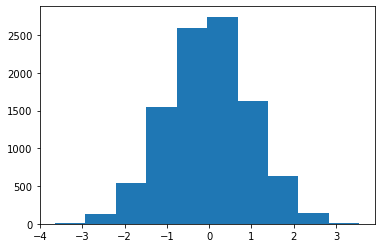

In [112]:
plt.hist(x)

The above histogram shows a "bell-shaped" curve of distribution in which the probability that a random number occurring away from the centre decreases rapidly, but is never impossible.

#### random.random_sample, random.sample, random.ranf

All of the above functions read to have the same use i.e. returning random floats in the half open interval [0.0, 1.0].

In [117]:
np.random.random(4)

array([0.27934502, 0.9347107 , 0.8479724 , 0.31604422])

In [231]:
np.random.sample(3)

array([0.2123862 , 0.22623381, 0.23606823])

In [122]:
np.random.ranf(2)

array([0.86864755, 0.58800293])

#### random.choice

The random.choice method is used to get a random value from an array. It is used with one dimensional array and returns a new numpy array with randomly chosen values.
https://www.codeleaks.io/numpy-random-choice-python/



In [159]:
# Retuning a random value from an array
matrix = ['red pill', 'blue pill']

In [158]:
print(np.random.choice(matrix))

red pill


In [160]:
# Returning a random interger between 0 - 9
np.random.choice(10)

9

In [202]:
# An array of 5 random intergers between 0 and 6
x = np.random.choice(10, 5000)

In [203]:
x

array([0, 5, 3, ..., 0, 0, 1])

In [241]:
# Probability of each element of in the array can also be set
prob = np.random.choice(5, 100, p =[0.2, 0.1, 0.3, 0.4, 0]) # p must add up to 1.
prob

array([3, 3, 0, 3, 2, 0, 3, 2, 0, 3, 1, 0, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2,
       3, 0, 1, 2, 2, 0, 2, 3, 3, 2, 0, 0, 2, 3, 2, 2, 0, 0, 2, 2, 3, 1,
       1, 2, 3, 3, 3, 0, 1, 3, 1, 1, 2, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 2, 0, 3,
       3, 3, 3, 3, 3, 1, 1, 0, 3, 2, 2, 3])

(array([18.,  0.,  0., 13.,  0.,  0., 32.,  0.,  0., 37.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

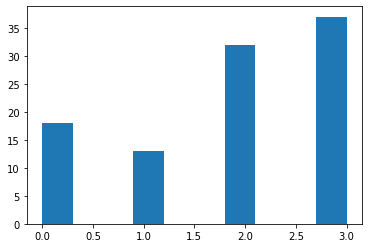

In [242]:
plt.hist(prob)

#### random.bytes

This function outputs a string equalling the parameter(lenght) passed to it.

In [263]:
# Generates a string of 3 random bytes
np.random.bytes(3)

b"\xcd'\xfc"

### References

### End